In [1]:
! pip install scanpy

     |████████████████████████████████| 2.0 MB 16.9 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 110.3 MB/s eta 0:00:01
     |████████████████████████████████| 26.7 MB 67.5 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 68.2 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 1.6 MB/s  eta 0:00:01
     |████████████████████████████████| 4.5 MB 88.9 MB/s eta 0:00:01
     |████████████████████████████████| 91 kB 768 kB/s s eta 0:00:01
     |████████████████████████████████| 9.9 MB 55.0 MB/s eta 0:00:01
     |████████████████████████████████| 5.9 MB 55.3 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 70.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 56.9 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 2.0 MB/s  eta 0:00:01
     |████████████████████████████████| 381 kB 76.3 MB/s eta 0:00:01
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82706 sha256=cd54c9b968

In [2]:
import scanpy
import re
import numpy as np

In [3]:
adata = scanpy.read("./sp.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 14968 × 12809
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'sample_name', 'sample_name2', 'image_name', 'slide', 'position', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', '_indices'
    var: 'feature_types', 'genome', 'SYMBOL', 'mt', 'n_cells_by_counts-ST8059048', 'mean_counts-ST8059048', 'log1p_mean_counts-ST8059048', 'pct_dropout_by_counts-ST8059048', 'total_counts-ST8059048', 'log1p_total_counts-ST8059048', 'n_cells_by_counts-ST8059049', 'mean_counts-ST8059049', 'log1p_mean_counts-ST8059049', 'pct_dropout_by_counts-ST8059049', 'total_counts-ST8059049', 'log1p_total_counts-ST8059049', 'n_cells_by_counts-ST8059050', 'mean_counts-ST8059050', 'log1p_mean_counts-ST8059050', 'pct_dropout_by_count

In [7]:
adata.obs["image_name"] 

spot_id
ST8059048_AAACAAGTATCTCCCA-1    mouse_brain_he_Library_028_C05717_020_C1_14460...
ST8059048_AAACACCAATAACTGC-1    mouse_brain_he_Library_028_C05717_020_C1_14460...
ST8059048_AAACAGAGCGACTCCT-1    mouse_brain_he_Library_028_C05717_020_C1_14460...
ST8059048_AAACAGCTTTCAGAAG-1    mouse_brain_he_Library_028_C05717_020_C1_14460...
ST8059048_AAACAGGGTCTATATT-1    mouse_brain_he_Library_028_C05717_020_C1_14460...
                                                      ...                        
ST8059052_TTGTTCAGTGTGCTAC-1    mouse_brain_he_Library_029_C05717_021_C1_14460...
ST8059052_TTGTTGTGTGTCAAGA-1    mouse_brain_he_Library_029_C05717_021_C1_14460...
ST8059052_TTGTTTCACATCCAGG-1    mouse_brain_he_Library_029_C05717_021_C1_14460...
ST8059052_TTGTTTCCATACAACT-1    mouse_brain_he_Library_029_C05717_021_C1_14460...
ST8059052_TTGTTTGTGTAAATTC-1    mouse_brain_he_Library_029_C05717_021_C1_14460...
Name: image_name, Length: 14968, dtype: category
Categories (5, object): ['mouse_brain_he_

In [8]:
adata.uns["spatial"].keys()

dict_keys(['spaceranger100_count_30458_ST8059048_mm10-3_0_0_premrna', 'spaceranger100_count_30458_ST8059049_mm10-3_0_0_premrna', 'spaceranger100_count_30458_ST8059050_mm10-3_0_0_premrna', 'spaceranger100_count_30458_ST8059051_mm10-3_0_0_premrna', 'spaceranger100_count_30458_ST8059052_mm10-3_0_0_premrna'])

In [10]:
sample_ids = np.unique(adata.obs[["sample"]])
sample_ids

array(['ST8059048', 'ST8059049', 'ST8059050', 'ST8059051', 'ST8059052'],
      dtype=object)

In [11]:
md = {}
for i in adata.uns["spatial"]:
    sample_id = re.search(".*_count_\d+_(.+)_mm.*", i).group(1)
    md[sample_id] = adata.uns["spatial"][i]["scalefactors"]

In [12]:
md

{'ST8059048': {'fiducial_diameter_fullres': 230.00624495330453,
  'spot_diameter_fullres': 142.3848183044266,
  'tissue_hires_scalef': 0.1153336,
  'tissue_lowres_scalef': 0.03460008},
 'ST8059049': {'fiducial_diameter_fullres': 230.00786717912405,
  'spot_diameter_fullres': 142.38582253945773,
  'tissue_hires_scalef': 0.11598237,
  'tissue_lowres_scalef': 0.03479471},
 'ST8059050': {'fiducial_diameter_fullres': 230.03824698613005,
  'spot_diameter_fullres': 142.40462908665194,
  'tissue_hires_scalef': 0.115380175,
  'tissue_lowres_scalef': 0.034614053},
 'ST8059051': {'fiducial_diameter_fullres': 229.0276908100841,
  'spot_diameter_fullres': 141.7790466919568,
  'tissue_hires_scalef': 0.11640766,
  'tissue_lowres_scalef': 0.034922298},
 'ST8059052': {'fiducial_diameter_fullres': 229.28005580436098,
  'spot_diameter_fullres': 141.9352726407949,
  'tissue_hires_scalef': 0.11682243,
  'tissue_lowres_scalef': 0.03504673}}

In [13]:
adata.obsm["spatial"]

array([[12791, 10834],
       [ 3699, 12544],
       [11918,  3972],
       ...,
       [ 6036, 12205],
       [ 4410,  9728],
       [ 7065,  2521]])

In [8]:
adata.obs["Y"] = adata.obsm["spatial"][:, 0]
adata.obs["X"] = adata.obsm["spatial"][:, 1]

In [9]:
jpg_names = [re.search(".*_(.*).jpg", n).group(1) for n in adata.obs.image_name]

In [10]:
adata.obs["jpg_names"] = jpg_names

In [35]:
for n, grp in adata.obs.groupby("jpg_names"):
    spot_coord_fname = n + ".csv"
    current_md = md[grp["sample"][0]]
    grp["spot_diameter_fullres"] = current_md["spot_diameter_fullres"]
    grp["tissue_hires_scalef"] = current_md["tissue_hires_scalef"]
    grp[["Y", "X", "_indices", "spot_diameter_fullres", "tissue_hires_scalef"]].to_csv(spot_coord_fname)

# Load

In [14]:
import pandas as pd
import tifffile as tf
from skimage.io import imread
from skimage.draw import disk
import PIL
PIL.Image.MAX_IMAGE_PIXELS = None
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,20)

In [51]:
! ls

144600.csv	  144602.csv	    144604.csv		      zarr
144600_color.jpg  144602_color.jpg  144604_color.jpg	      zarr_0.2.6
144601.csv	  144603.csv	    Export_spot_coords.ipynb
144601_color.jpg  144603_color.jpg  sp.h5ad


In [77]:
img_stem = "144600"
d = pd.read_csv(f"{img_stem}.csv")
img = imread(f"{img_stem}_color.jpg")
d

,spot_id,Y,X,_indices,spot_diameter_fullres,tissue_hires_scalef
0,ST8059048_AAACAAGTATCTCCCA-1,12791,10834,0,142.384818,0.115334
1,ST8059048_AAACACCAATAACTGC-1,3699,12544,1,142.384818,0.115334
2,ST8059048_AAACAGAGCGACTCCT-1,11918,3972,2,142.384818,0.115334
3,ST8059048_AAACAGCTTTCAGAAG-1,2606,9494,3,142.384818,0.115334
4,ST8059048_AAACAGGGTCTATATT-1,3043,10257,4,142.384818,0.115334
...,...,...,...,...,...,...
2982,ST8059048_TTGTTCAGTGTGCTAC-1,8632,5876,2982,142.384818,0.115334
2983,ST8059048_TTGTTGTGTGTCAAGA-1,10055,7211,2983,142.384818,0.115334
2984,ST8059048_TTGTTTCACATCCAGG-1,6219,12355,2984,142.384818,0.115334
2985,ST8059048_TTGTTTCATTAGTCTA-1,4904,12735,2985,142.384818,0.115334


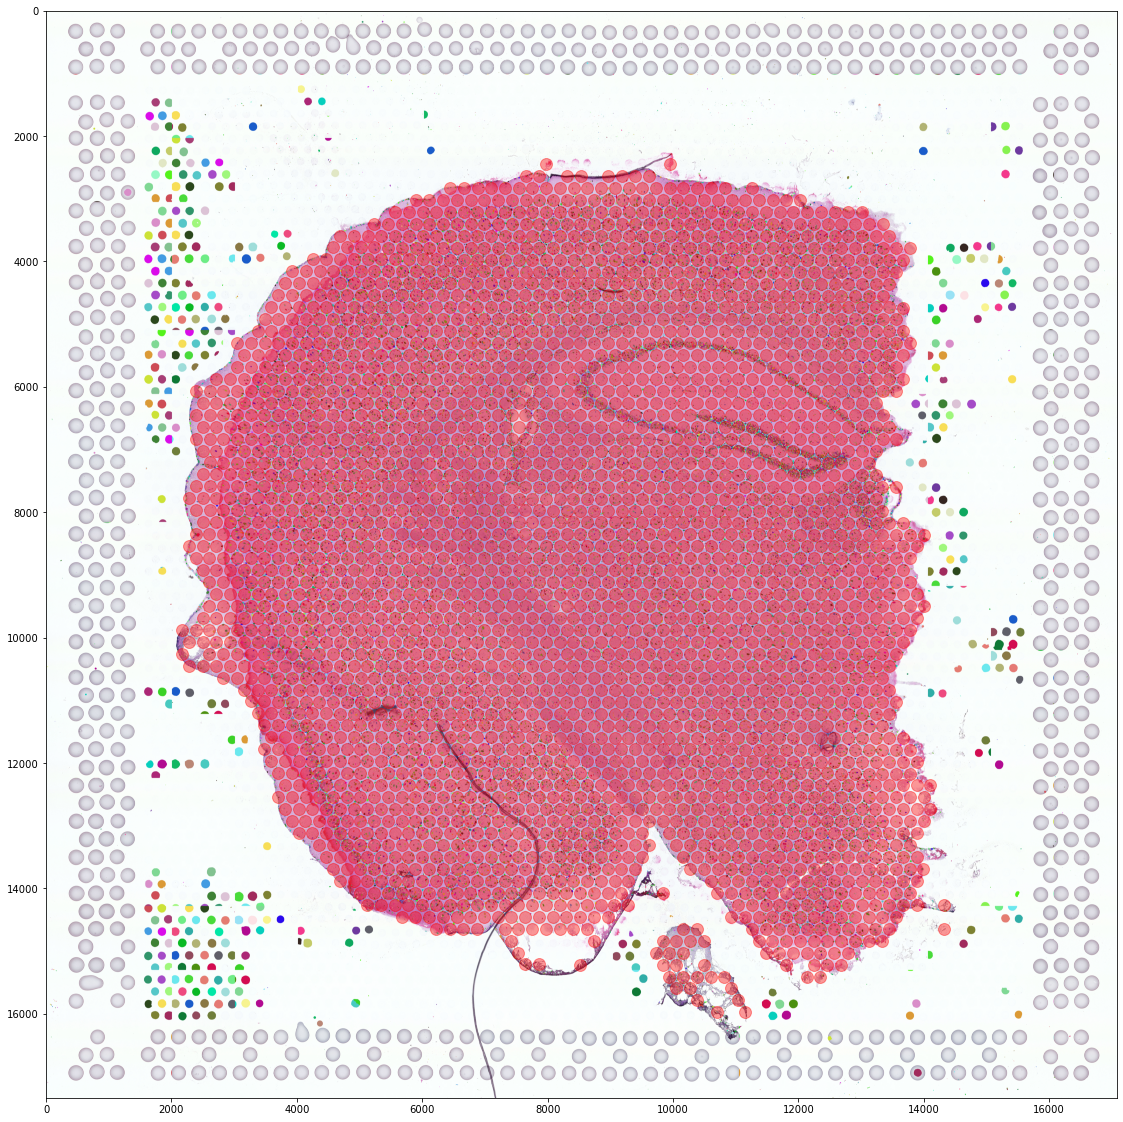

In [78]:
fig, ax = plt.subplots(1, 1)
ax.scatter(d.Y, d.X, c="r", s=d.spot_diameter_fullres[0], alpha=0.4)
ax.imshow(img)

In [79]:
labeImg = np.zeros_like(img[..., 0], dtype=np.uint16)

In [80]:
circle_shape = (d.spot_diameter_fullres[0], d.spot_diameter_fullres[0])
for spId in d.index:
#     rr, cc = disk((d.loc[spId].X, d.loc[spId].Y), d.loc[spId].spot_diameter_fullres/2)
#     labeImg[rr, cc] = spId
    labeImg[disk((d.loc[spId].X, d.loc[spId].Y), d.loc[spId].spot_diameter_fullres/2)] = spId
labeImg.shape

(17341, 17075)

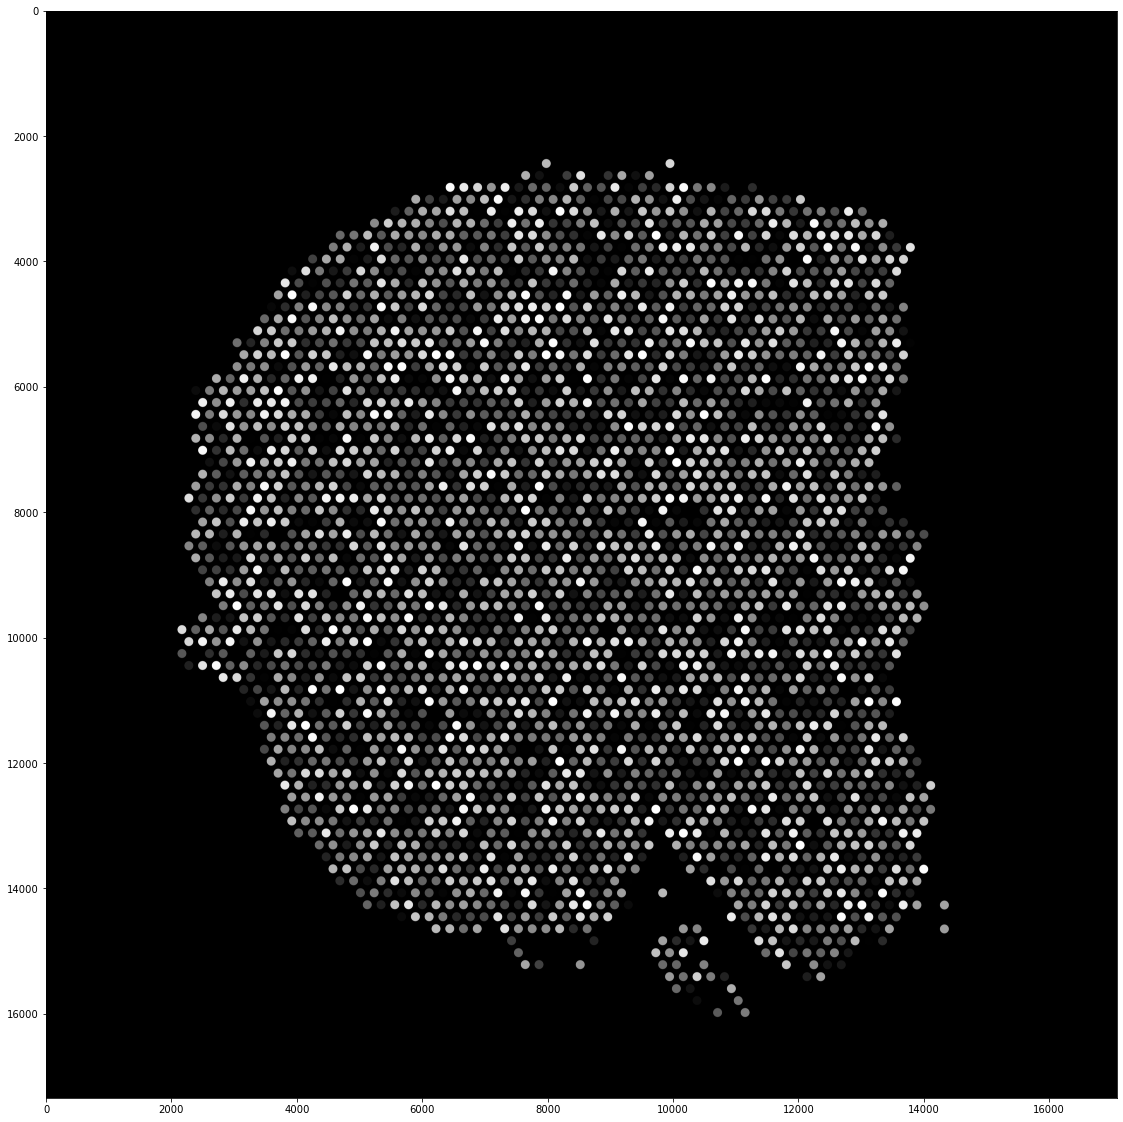

In [81]:
fig, ax = plt.subplots(1, 1)
ax.imshow(labeImg, cmap="gray")

In [83]:
tf.imwrite(f"./demo_visium_dataset_20220124/{img_stem}.tif", labeImg)